
# Project: Investigate a Dataset: FBI Gun and U.S. Census Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

![alt text](https://assets.bwbx.io/images/users/iqjWHBFdfxIU/i0ssMRndzN1o/v1/-1x-1.jpg)

<a id='intro'></a>
# Introduction
## Data source
1. FBI NICS Gun Data is downloaded directly from [GitHub](https://github.com/BuzzFeedNews/nics-firearm-background-checks/tree/master/data), BuzzFeedNews. The data is parsed into xlsx file by Python code from a PDF file. The data is coverred from 1998 to August 2017.
2. U.S. Census data is dowloaded from [here](https://d17h27t6h515a5.cloudfront.net/topher/2017/November/5a0a554c_u.s.-census-data/u.s.-census-data.csv.) in csv format

## Assumption on FBI background checks to Gun sales
1. As emphasized in the [README](https://github.com/BuzzFeedNews/nics-firearm-background-checks), there is high uncertainties to make one-to-one correlation between background checks and gun sales
2. There is considerable differences on requirements on background checks such as the case with Kentucky and California
3. FBI data numbers are not included private sales, and a [Harvard's study](https://www.thetrace.org/2015/10/private-sale-loophole-background-check-harvard-research/) reproted that roughly 40% of recent firearm acquiresition does not include a background check
4. One way to approximate gun sales is based on [Jurgen Brauer](http://www.smallarmssurvey.org/fileadmin/docs/F-Working-papers/SAS-WP14-US-Firearms-Industry.pdf) which a background check on a long gun or a short gun is counted as 1-to-1, and a multiple is counted as 2-to-1 between gun sale and background check

## Other references
1. [The New York Times](https://www.nytimes.com/interactive/2015/12/10/us/gun-sales-terrorism-obama-restrictions.html) analyzed FBI NICS data made some correlations between gun sales and call for new gun restrictions
2. Some good questions suggested by Udacity on this set of data including:
    <ul>
    <li><a href="#q1">What census data is most associated with high gun per capita?</a></li>
    <li><a href="#q2">Which states have had the highest growth in gun registrations?</a></li>
    <li><a href="#q3">What is the overall trend of gun purchases?</a></li>
    </ul>
3. The analysis focus on **gun sale** proxy and other dependent variable such as **time, state, census data**

____

<a id='wrangling'></a>
# Data Wrangling

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# make graph nicer
import seaborn as sns

In [2]:
# load data from files
gun = pd.read_excel('gun_data.xlsx')
# xlrd libary is needed to read data from .xlsx file 

In [3]:
# start probing
gun.head(3)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394


In [4]:
# some probing and checking, look like they are numeric values
gun.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


In [5]:
gun.shape

(12485, 27)

In [6]:
# check for non-null value, # rows for each column
gun.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other   

In [7]:
# list name of columns, easier to copy-paste
gun.columns

Index(['month', 'state', 'permit', 'permit_recheck', 'handgun', 'long_gun',
       'other', 'multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun',
       'prepawn_other', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'returned_handgun', 'returned_long_gun',
       'returned_other', 'rentals_handgun', 'rentals_long_gun',
       'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other', 'totals'],
      dtype='object')

In [8]:
# select key columns to be kepts, keep the `total` column as well (although I have not pinpointed to its definition)
cols= ['month', 'state', 'handgun', 'long_gun','multiple',  'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other', 'totals' ]

## clean FBI dataset

In [9]:
# select relevant columns
gun = gun[cols]

In [10]:
# check the shape to make sure 
gun.shape

(12485, 9)

In [11]:
gun.head(1)

,month,state,handgun,long_gun,multiple,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,5734.0,6320.0,317,0.0,0.0,3.0,32019


In [12]:
# no duplicated
sum(gun.duplicated())

0

In [13]:
# check for columns containg null value
gun.isnull().any()

month                        False
state                        False
handgun                       True
long_gun                      True
multiple                     False
return_to_seller_handgun      True
return_to_seller_long_gun     True
return_to_seller_other        True
totals                       False
dtype: bool

In [14]:
# fill null cell by value 0
gun = gun.fillna(0);

In [15]:
# estimate gun sales by Jurgen Brauer's approach
gun['gun_sales'] = gun['handgun'] + gun['long_gun'] + 2*gun['multiple'] 

In [16]:
# esitmate gun sale taken into accounts of returned sales
gun['gun_sales_net'] = gun['gun_sales'] - gun['return_to_seller_handgun'] + gun['return_to_seller_long_gun'] + gun['return_to_seller_other'] 

In [17]:
gun.head(3)

,month,state,handgun,long_gun,multiple,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,gun_sales,gun_sales_net
0,2017-09,Alabama,5734.0,6320.0,317,0.0,0.0,3.0,32019,12688.0,12691.0
1,2017-09,Alaska,2320.0,2930.0,160,0.0,0.0,0.0,6303,5570.0,5570.0
2,2017-09,Arizona,11063.0,7946.0,631,0.0,0.0,0.0,28394,20271.0,20271.0


In [18]:
# check month columns data type
gun['month'].dtype

dtype('O')

In [19]:
# not yet datetime object, let convert it to datetime
gun['month'] = pd.to_datetime(gun['month'])

In [20]:
gun['month'].dtype

dtype('<M8[ns]')

In [21]:
gun.head(1)

,month,state,handgun,long_gun,multiple,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,gun_sales,gun_sales_net
0,2017-09-01,Alabama,5734.0,6320.0,317,0.0,0.0,3.0,32019,12688.0,12691.0


In [22]:
# let check if the differences of the net estimate and rough estimation of fireamrs sale

In [23]:
df_temp = gun['gun_sales']/gun['gun_sales_net']
print(df_temp.mean())
print(df_temp.std())

0.9999967969890268
9.014294999649161e-05


__they are very closed to each other, I will use *gun_sales* columns for the next step__

In [24]:
drop_cols = ['return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other', 'gun_sales_net', 'totals']

In [25]:
gun = gun.drop(columns=drop_cols)

In [26]:
# save the cleaned data to a file
gun.to_csv('gun_data_v1.csv', index=False)

## Load and wrangle U.S. census data

In [27]:
pop = pd.read_csv('U.S. Census Data.csv')

In [28]:
# probing
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
Fact              80 non-null object
Fact Note         28 non-null object
Alabama           65 non-null object
Alaska            65 non-null object
Arizona           65 non-null object
Arkansas          65 non-null object
California        65 non-null object
Colorado          65 non-null object
Connecticut       65 non-null object
Delaware          65 non-null object
Florida           65 non-null object
Georgia           65 non-null object
Hawaii            65 non-null object
Idaho             65 non-null object
Illinois          65 non-null object
Indiana           65 non-null object
Iowa              65 non-null object
Kansas            65 non-null object
Kentucky          65 non-null object
Louisiana         65 non-null object
Maine             65 non-null object
Maryland          65 non-null object
Massachusetts     65 non-null object
Michigan          65 non-null object
Minnesota

65 rows for each states, 80 rows for 'Fact' and 25 rows for 'Fact Note' 

In [29]:
pop.shape

(85, 52)

In [30]:
pop.head(3)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%


In [31]:
pop['Fact Note']

0                                                   NaN
1                                                   NaN
2                                                   NaN
3                                                   NaN
4                                                   NaN
5                                                   NaN
6                                                   NaN
7                                                   NaN
8                                                   NaN
9                                                   NaN
10                                                  NaN
11                                                  NaN
12                                                  (a)
13                                                  (a)
14                                                  (a)
15                                                  (a)
16                                                  (a)
17                                              

As the name suggested, column 'Fact Note' elaborated on some of the columns

In [32]:
# drop fact note
pop.drop(columns='Fact Note', inplace=True)

In [33]:
pop.shape

(85, 51)

In [34]:
# check the rows beyound 65th, seems nothing much here
pop['Fact'].iloc[65:]

65                                                  NaN
66    NOTE: FIPS Code values are enclosed in quotes ...
67                                                  NaN
68                                          Value Notes
69                                                    1
70                                                  NaN
71                                           Fact Notes
72                                                  (a)
73                                                  (b)
74                                                  (c)
75                                                  NaN
76                                          Value Flags
77                                                    -
78                                                    D
79                                                    F
80                                                   FN
81                                                  NaN
82                                              

some more explaintion on the rows beyound 65

In [35]:
# let get data by the number index
pop = pop.iloc[0:65]

In [36]:
# make sure we did not lose the last column
pop.tail(3)

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
62,"Population per square mile, 2010",94.4,1.2,56.3,56,239.1,48.5,738.1,460.8,350.6,...,10.7,153.9,96.3,33.6,67.9,202.6,101.2,77.1,105,5.8
63,"Land area in square miles, 2010","50,645.33","570,640.95","113,594.08","52,035.48","155,779.22","103,641.89","4,842.36","1,948.54","53,624.76",...,75811,41234.9,"261,231.71","82,169.62","9,216.66","39,490.09","66,455.52","24,038.21","54,157.80","97,093.14"
64,FIPS Code,"""01""","""02""","""04""","""05""","""06""","""08""","""09""","""10""","""12""",...,"""46""","""47""","""48""","""49""","""50""","""51""","""53""","""54""","""55""","""56"""


### let transform the table so that states be used as the index

In [37]:
pop = pop.transpose(copy=True)

In [38]:
pop.head(1)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2...","Population, percent change - April 1, 2010 (es...","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, ...","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016,...","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2...","Persons 65 years and over, percent, April 1, 2010",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code


### Check data types


In [39]:
pop.info();

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, Fact to Wyoming
Data columns (total 65 columns):
0     51 non-null object
1     51 non-null object
2     51 non-null object
3     51 non-null object
4     51 non-null object
5     51 non-null object
6     51 non-null object
7     51 non-null object
8     51 non-null object
9     51 non-null object
10    51 non-null object
11    51 non-null object
12    51 non-null object
13    51 non-null object
14    51 non-null object
15    51 non-null object
16    51 non-null object
17    51 non-null object
18    51 non-null object
19    51 non-null object
20    51 non-null object
21    51 non-null object
22    51 non-null object
23    51 non-null object
24    51 non-null object
25    51 non-null object
26    51 non-null object
27    51 non-null object
28    51 non-null object
29    51 non-null object
30    51 non-null object
31    51 non-null object
32    51 non-null object
33    51 non-null object
34    51 non-null object
35    51 non-null o

- no null data so far

In [40]:
# double check that the cells are not yet numeric values
pop.describe()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
count,51,51,51,51,51,51,51,51,51,51,...,51,51,51,51,51,51,51,51,51,51
unique,51,51,46,51,30,30,44,41,40,41,...,51,51,51,51,51,51,51,50,51,51
top,"39,250,017","8,001,041",1.70%,"5,303,925",6.40%,6.50%,22.80%,24.40%,15.00%,13.80%,...,"499,926","125,169",59044,"185,043","415,972",86571,"419,628",153.9,"54,157.80","""02"""
freq,1,1,3,1,6,4,3,3,4,4,...,1,1,1,1,1,1,1,2,1,1


__look like the number is not numerical, all values are treated as an unique__

- Many types of inputs, looking they are present in group

In [41]:
pop.to_csv('U.S Census Data -v1.csv', index=False)

____

## Data cleaning for US. Census 

select some columns that makes sense to analyze with gun purchase

In [42]:
# get some interesting columns
cols = pop.loc['Fact']

In [43]:
print(cols[30:])

30                                Households, 2011-2015
31                     Persons per household, 2011-2015
32    Living in same house 1 year ago, percent of pe...
33    Language other than English spoken at home, pe...
34    High school graduate or higher, percent of per...
35    Bachelor's degree or higher, percent of person...
36    With a disability, under age 65 years, percent...
37    Persons  without health insurance, under age 6...
38    In civilian labor force, total, percent of pop...
39    In civilian labor force, female, percent of po...
40    Total accommodation and food services sales, 2...
41    Total health care and social assistance receip...
42         Total manufacturers shipments, 2012 ($1,000)
43       Total merchant wholesaler sales, 2012 ($1,000)
44                    Total retail sales, 2012 ($1,000)
45                  Total retail sales per capita, 2012
46    Mean travel time to work (minutes), workers ag...
47    Median household income (in 2015 dollars),

In [44]:
# or even that note down the index number
select_index = [0, 2, 3, 8, 10, 12, 13, 20,35, 48, 49, 51, 62]

In [45]:
len(select_index)

13

In [46]:
# only select columns with pre-defined index
pop = pop[select_index]

In [47]:
# reset the index first to rename the first column
pop.reset_index(inplace=True)

In [48]:
# set name of the Fact row for the columns' name
pop.columns = pop.iloc[0]

In [49]:
# rename to state
pop.rename(columns={'Fact': 'state'}, inplace=True)

In [50]:
# and drop the fact row
# pop = pop.drop('Fact', axis=0)
pop = pop.drop(0, axis=0)

In [51]:
pop.head(2)

,state,"Population estimates, July 1, 2016, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Female persons, percent, July 1, 2016, (V2016)","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","Veterans, 2011-2015","Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015","Per capita income in past 12 months (in 2015 dollars), 2011-2015","Persons in poverty, percent","Total employment, 2015","Population per square mile, 2010"
1,Alabama,"4,863,300",1.70%,"4,779,736",16.10%,51.60%,69.30%,26.80%,"363,170",23.50%,"$24,091",17.10%,"1,634,391",94.4
2,Alaska,"741,894",4.50%,"710,231",10.40%,47.70%,66.10%,3.80%,"69,323",28.00%,"$33,413",9.90%,"267,999",1.2


In [52]:
# check data type, need to convert to numeric values
pop.dtypes

0
state                                                                                    object
Population estimates, July 1, 2016,  (V2016)                                             object
Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)    object
Population, Census, April 1, 2010                                                        object
Persons 65 years and over, percent,  July 1, 2016,  (V2016)                              object
Female persons, percent,  July 1, 2016,  (V2016)                                         object
White alone, percent, July 1, 2016,  (V2016)                                             object
Black or African American alone, percent, July 1, 2016,  (V2016)                         object
Veterans, 2011-2015                                                                      object
Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015                 object
Per capita income in past 12 months (i

__a few ways do it, such .replace for string. I use regular expression (regex)__

In [53]:
import re

In [54]:
# only select digits or a dot (for the fload) values
def get_number(str_):
    regex = '[(\d+)?(\.)]*\d+'
    matches = re.findall(regex, str_)
#     print(matches)
    return ''.join(matches)

In [55]:
# use .appy function with the function above
for col in pop.columns[1:]:
    pop[col] = pop[col].apply(get_number)

In [56]:
# convert all data to float, we can use int for some of the columns as well
for col in pop.columns[1:]:
    pop[col] = pop[col].astype(float)

In [57]:
# save data to a temporary file
pop.to_csv('U.S Census Data_v1.1.csv', index=False)

In [58]:
pop.head()

,state,"Population estimates, July 1, 2016, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Female persons, percent, July 1, 2016, (V2016)","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","Veterans, 2011-2015","Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015","Per capita income in past 12 months (in 2015 dollars), 2011-2015","Persons in poverty, percent","Total employment, 2015","Population per square mile, 2010"
1,Alabama,4863300.0,1.7,4779736.0,16.1,51.6,69.3,26.8,363170.0,23.5,24091.0,17.1,1634391.0,94.4
2,Alaska,741894.0,4.5,710231.0,10.4,47.7,66.1,3.8,69323.0,28.0,33413.0,9.9,267999.0,1.2
3,Arizona,6931071.0,8.4,6392017.0,16.9,50.3,83.3,4.9,505794.0,27.5,25848.0,16.4,2295186.0,56.3
4,Arkansas,2988248.0,2.5,2915918.0,16.3,50.9,79.4,15.7,220953.0,21.1,22798.0,17.2,1003113.0,56.0
5,California,39250017.0,5.4,37253956.0,13.6,50.3,72.7,6.5,1777410.0,31.4,30318.0,14.3,14325377.0,239.1


[got some good idea to get the digits from the string](https://github.com/Shilin-Li/Investigate_the_FBI_Gun_Dataset)


In [59]:
# check the name of the columns, quit long names, but I will use the index instead
for i, value in enumerate(pop.columns):
    print(i, value)

0 state
1 Population estimates, July 1, 2016,  (V2016)
2 Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)
3 Population, Census, April 1, 2010
4 Persons 65 years and over, percent,  July 1, 2016,  (V2016)
5 Female persons, percent,  July 1, 2016,  (V2016)
6 White alone, percent, July 1, 2016,  (V2016)
7 Black or African American alone, percent, July 1, 2016,  (V2016)
8 Veterans, 2011-2015
9 Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015
10 Per capita income in past 12 months (in 2015 dollars), 2011-2015
11 Persons in poverty, percent
12 Total employment, 2015
13 Population per square mile, 2010


In [60]:
# turn some of the columns to per capita
pop['veteran_portion'] = pop[pop.columns[8]]/pop[pop.columns[1]] 
pop['employment_portion'] = pop[pop.columns[12]]/pop[pop.columns[1]] 

In [61]:
gun.head(1)

,month,state,handgun,long_gun,multiple,gun_sales
0,2017-09-01,Alabama,5734.0,6320.0,317,12688.0


In [62]:
gun_state = gun.groupby('state')['gun_sales'].sum()

In [63]:
# merge population with gun data
df = pop.merge(gun_state.to_frame(), on='state')

In [64]:
df.to_csv('gun_pop_v1.csv', index=False)

In [65]:
sum(df.isnull().any())

0

<a id='eda'></a>
# Exploratory Data Analysis
<ol>
<li><a href="#q1">What census data is most associated with high gun per capita?</a></li>
<li><a href="#q2">Which states have had the highest growth in gun registrations?</a></li>
<li><a href="#q3">What is the overall trend of gun purchases?</a></li>
</ol>

<a id='q1'></a>
## 1. What census data is most associated with high gun per capita?

In [66]:
df.head(1)

,state,"Population estimates, July 1, 2016, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Female persons, percent, July 1, 2016, (V2016)","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","Veterans, 2011-2015","Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015","Per capita income in past 12 months (in 2015 dollars), 2011-2015","Persons in poverty, percent","Total employment, 2015","Population per square mile, 2010",veteran_portion,employment_portion,gun_sales
0,Alabama,4863300.0,1.7,4779736.0,16.1,51.6,69.3,26.8,363170.0,23.5,24091.0,17.1,1634391.0,94.4,0.074676,0.336066,5058526.0


In [67]:
for i,value in enumerate(df.columns):
    print(i, value)

0 state
1 Population estimates, July 1, 2016,  (V2016)
2 Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)
3 Population, Census, April 1, 2010
4 Persons 65 years and over, percent,  July 1, 2016,  (V2016)
5 Female persons, percent,  July 1, 2016,  (V2016)
6 White alone, percent, July 1, 2016,  (V2016)
7 Black or African American alone, percent, July 1, 2016,  (V2016)
8 Veterans, 2011-2015
9 Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015
10 Per capita income in past 12 months (in 2015 dollars), 2011-2015
11 Persons in poverty, percent
12 Total employment, 2015
13 Population per square mile, 2010
14 veteran_portion
15 employment_portion
16 gun_sales


In [68]:
cols_to_drop = [8, 12 ]

In [69]:
cols_name = [df.columns[i] for i in cols_to_drop]

In [70]:
df = df.drop(columns=cols_name)

## Let do some explorarory first

In [71]:
df['gun_capita'] = df['gun_sales']/df[df.columns[1]]

In [72]:
df.head(1)

,state,"Population estimates, July 1, 2016, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Female persons, percent, July 1, 2016, (V2016)","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015","Per capita income in past 12 months (in 2015 dollars), 2011-2015","Persons in poverty, percent","Population per square mile, 2010",veteran_portion,employment_portion,gun_sales,gun_capita
0,Alabama,4863300.0,1.7,4779736.0,16.1,51.6,69.3,26.8,23.5,24091.0,17.1,94.4,0.074676,0.336066,5058526.0,1.040143


In [73]:
df['gun_capita'].unique()

array([1.04014270e+00, 1.43495432e+00, 4.95188695e-01, 9.21167855e-01,
       3.12442616e-01, 1.05913714e+00, 4.28750057e-01, 4.90388786e-01,
       4.96032808e-01, 4.45469421e-01, 2.94002969e-05, 8.41898475e-01,
       3.85822673e-01, 7.04075484e-01, 2.53328157e-01, 8.03451600e-01,
       9.49743451e-01, 9.09925868e-01, 9.05855819e-01, 2.73801298e-01,
       1.66609780e-01, 3.87081172e-01, 6.71554209e-01, 1.01079892e+00,
       9.37694403e-01, 1.44150040e+00, 2.91796094e-01, 5.04628480e-01,
       8.71426698e-01, 1.27577053e-01, 8.58884246e-01, 1.89644021e-01,
       3.14000943e-01, 1.07066674e+00, 6.71238301e-01, 1.02934248e+00,
       9.18606364e-01, 9.12721512e-01, 2.90748240e-01, 5.64387188e-01,
       1.30065145e+00, 9.34878309e-01, 5.34090650e-01, 5.07491601e-01,
       7.80093949e-01, 6.93193306e-01, 5.82883095e-01, 1.44383601e+00,
       7.38160848e-01, 1.28617031e+00])

In [74]:
df['gun_capita'].nunique()

50

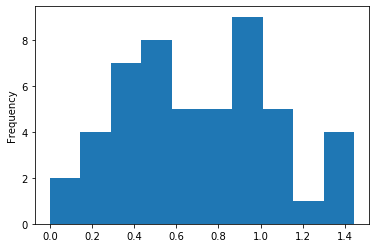

In [75]:
df['gun_capita'].plot.hist();

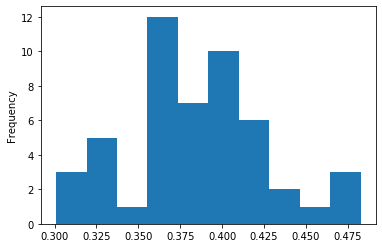

In [76]:
df['employment_portion'].plot.hist();

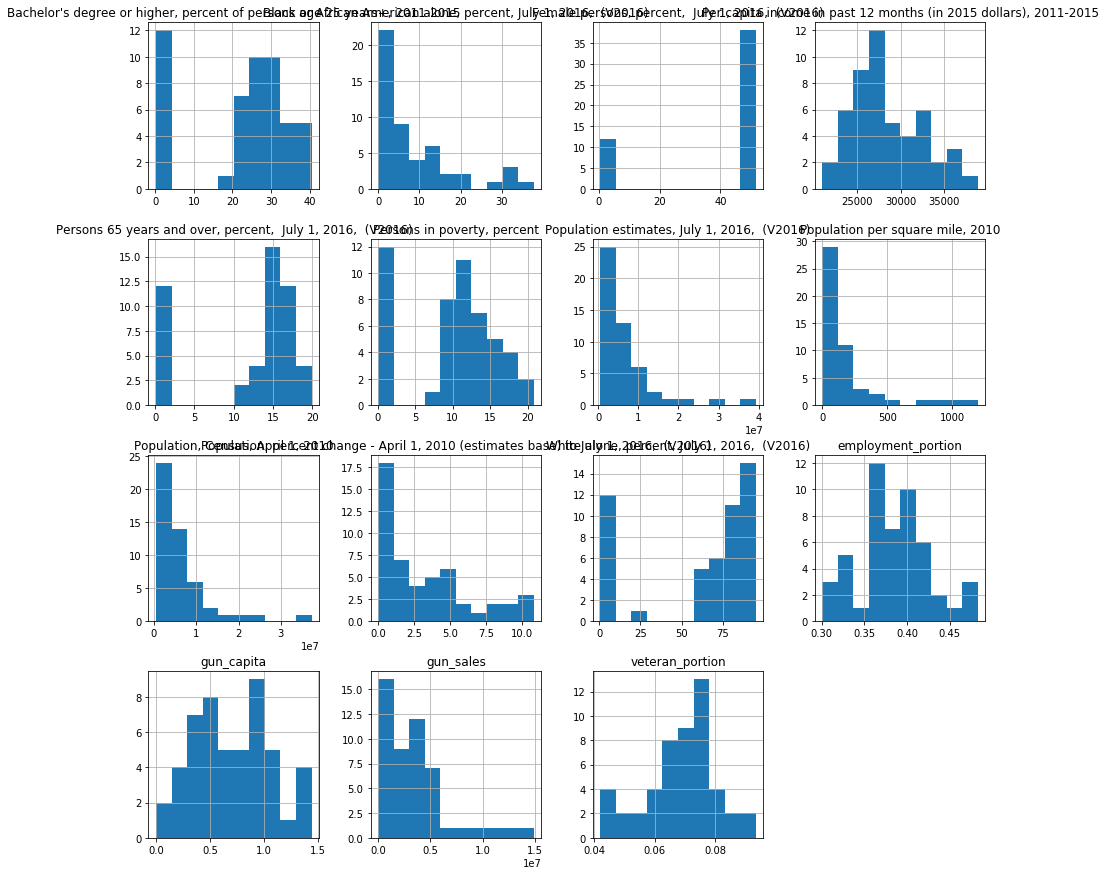

In [77]:
# let look at the distribution against gun per capita
df.hist(figsize=(15,15));

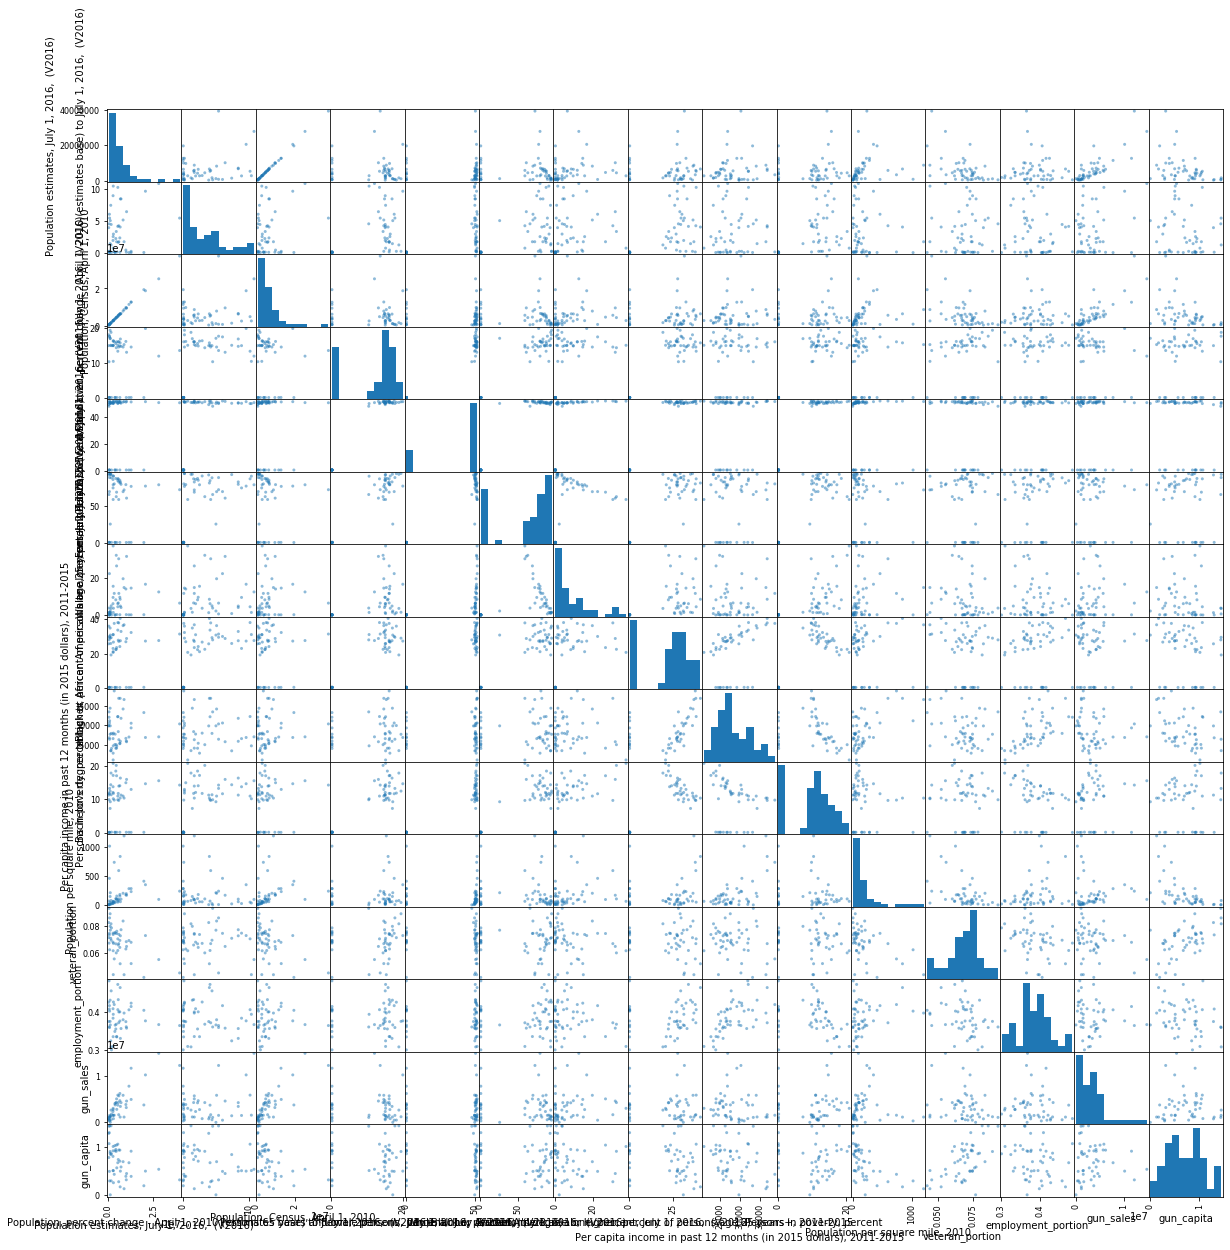

In [78]:
pd.plotting.scatter_matrix(df, figsize=(20,20));

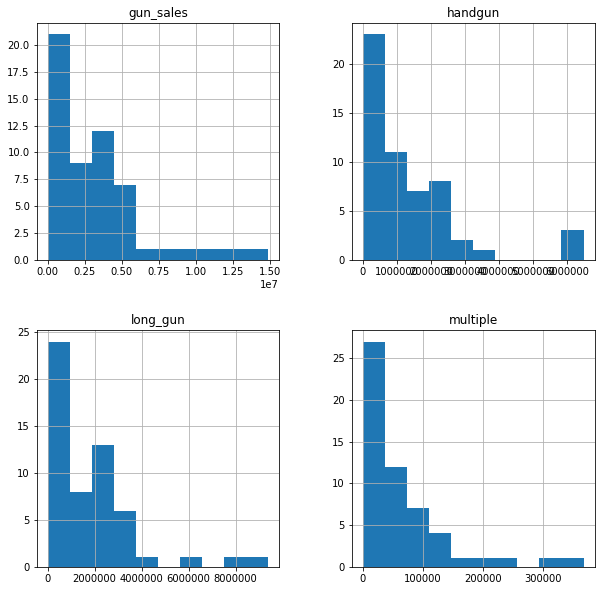

In [79]:
# let explore FBI NICS background checks data
gun.groupby('state').sum().hist(figsize=(10,10));

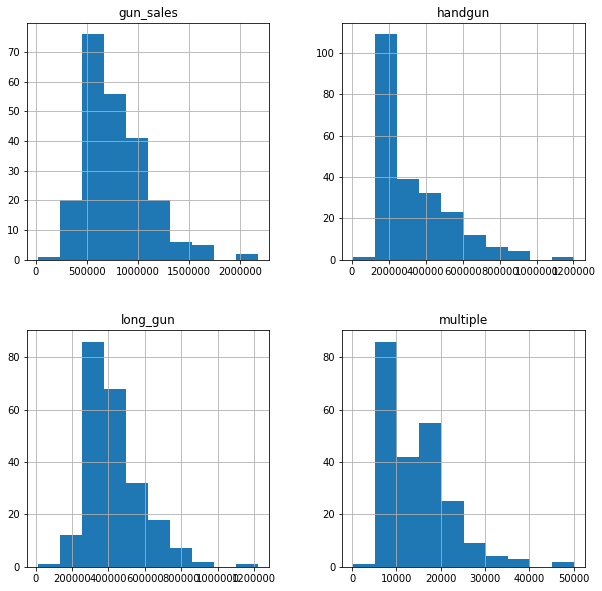

In [80]:
gun.groupby('month').sum().hist(figsize=(10,10));

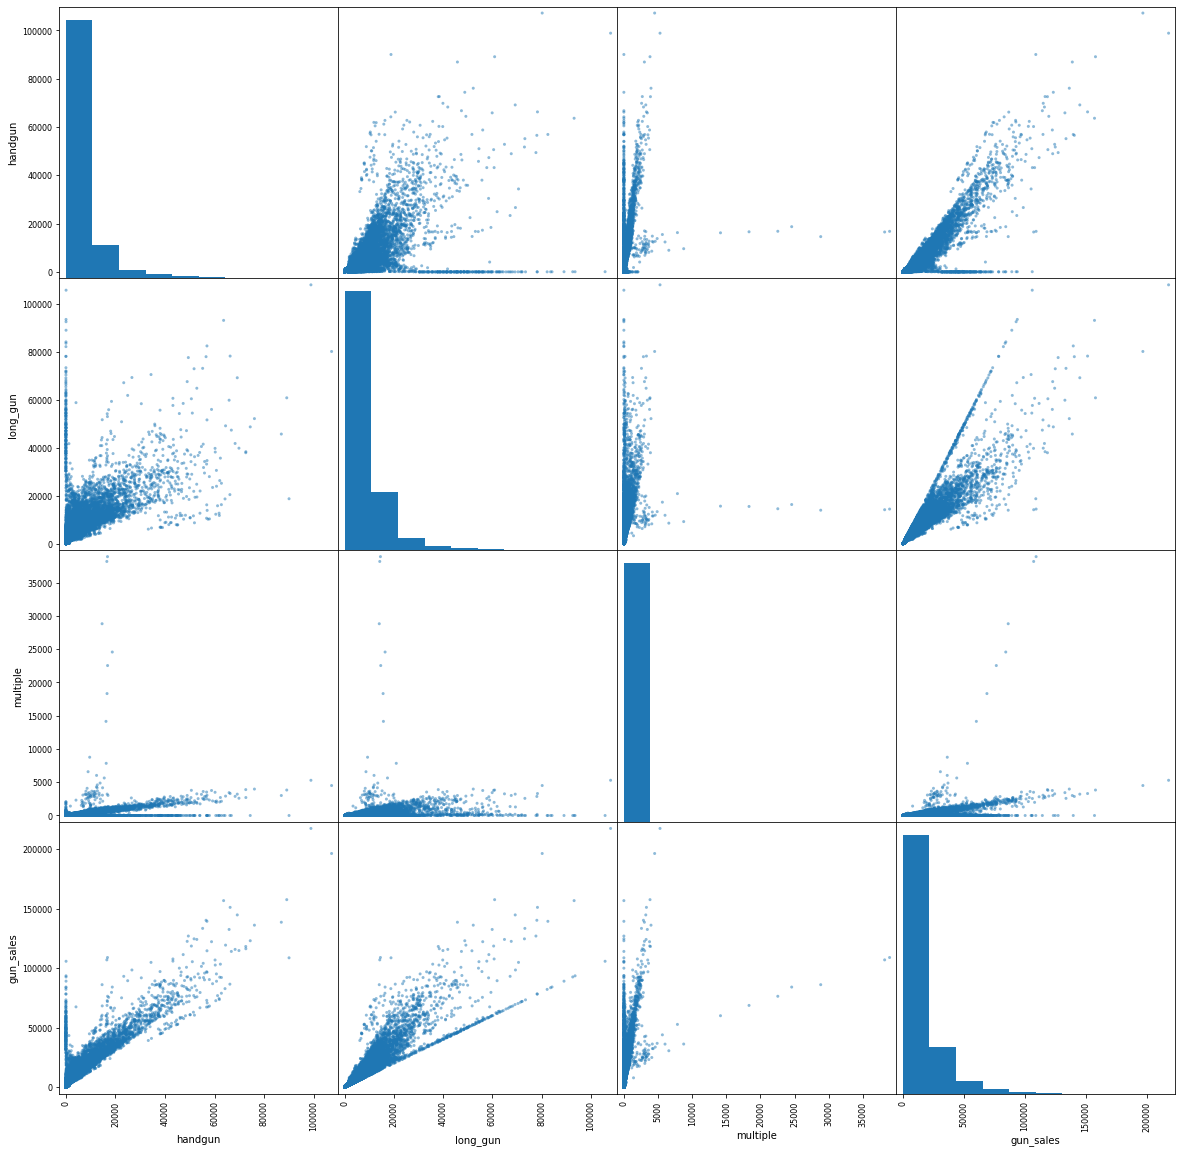

In [81]:
pd.plotting.scatter_matrix(gun, figsize=(20,20));

### not great to look into details but the plots gives some ideal about the frequency and the values, I will dive into by matplotlib later on

In [82]:
for i, value in enumerate(df.columns):
    print(i, value)

0 state
1 Population estimates, July 1, 2016,  (V2016)
2 Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)
3 Population, Census, April 1, 2010
4 Persons 65 years and over, percent,  July 1, 2016,  (V2016)
5 Female persons, percent,  July 1, 2016,  (V2016)
6 White alone, percent, July 1, 2016,  (V2016)
7 Black or African American alone, percent, July 1, 2016,  (V2016)
8 Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015
9 Per capita income in past 12 months (in 2015 dollars), 2011-2015
10 Persons in poverty, percent
11 Population per square mile, 2010
12 veteran_portion
13 employment_portion
14 gun_sales
15 gun_capita


In [83]:
idx_graph = [2, 4, 5,6, 7, 8, 9, 10, 11, 12, 13, 14]

In [84]:
def draw_graph(index_, df=df):
    fig, ax = plt.subplots(figsize=(9,6))
    ax.set_title(f'correlation to firearm purchase')
    ax.set_xlabel('gun per capita')
    ax.set_ylabel(df.columns[index_])
    ax.scatter(x=df['gun_capita'], y=df[df.columns[index_]])
    return None

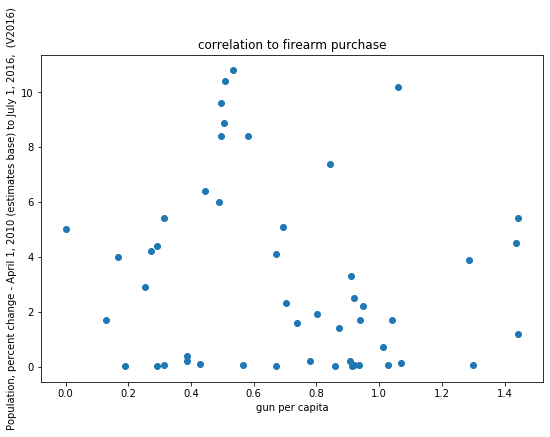

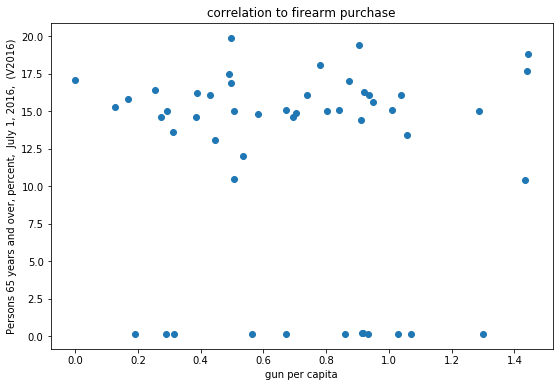

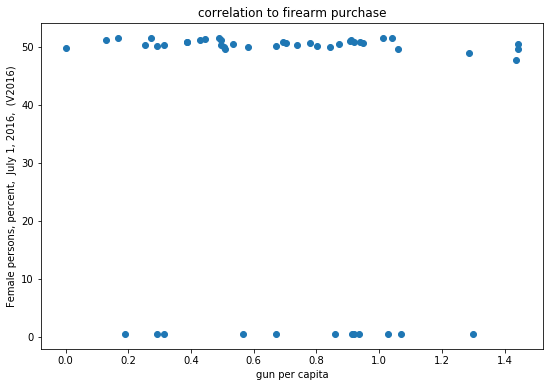

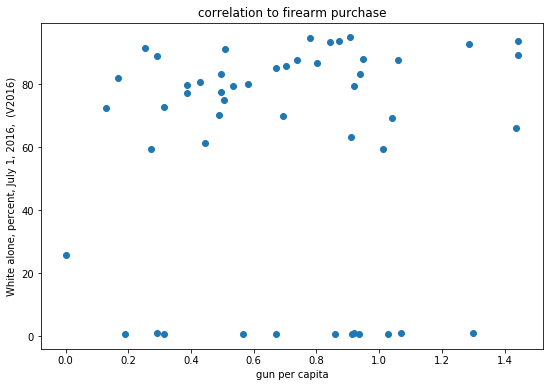

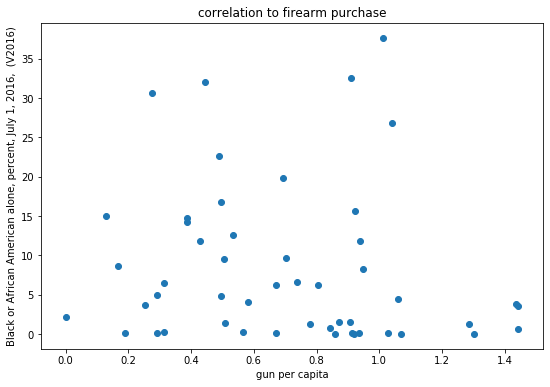

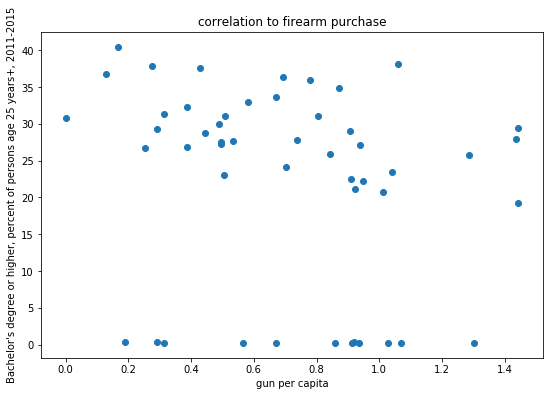

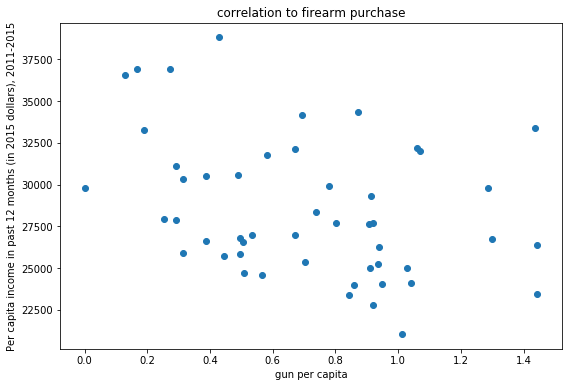

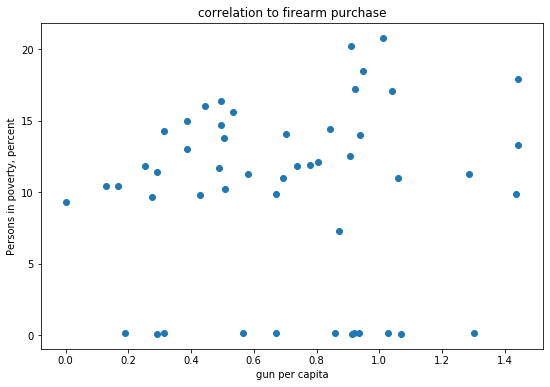

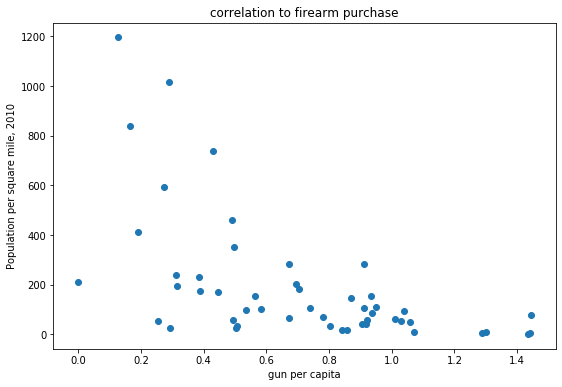

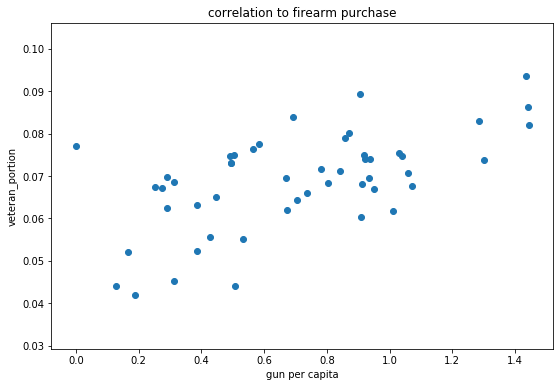

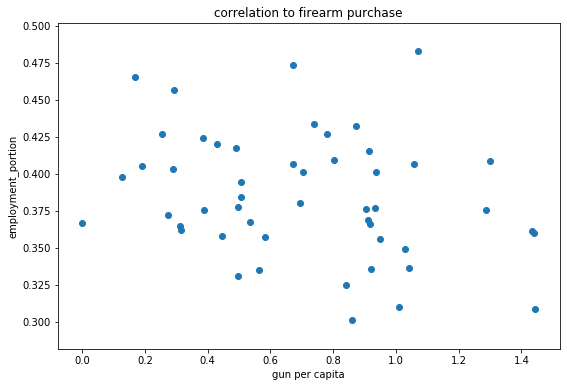

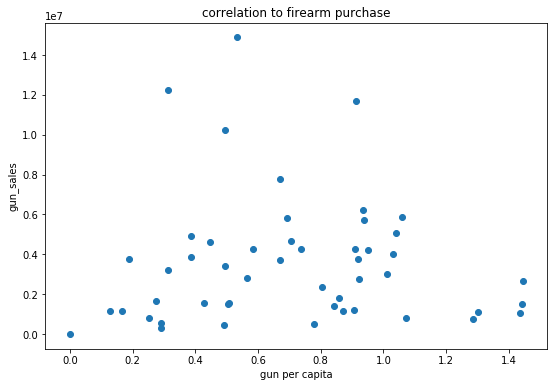

In [85]:
for idx in idx_graph:
    draw_graph(idx)

- as least the land per capita correlated with gun per capita, and the unit makes sense, too. Sparse population tends two buy (own) more gun than more crowded states
- veteran per capita seems to have a positive change on gun sale

<a id='q2'></a>
## Question 2: Let figure out how to get gun growth between different states

In [86]:
gun.head()

,month,state,handgun,long_gun,multiple,gun_sales
0,2017-09-01,Alabama,5734.0,6320.0,317,12688.0
1,2017-09-01,Alaska,2320.0,2930.0,160,5570.0
2,2017-09-01,Arizona,11063.0,7946.0,631,20271.0
3,2017-09-01,Arkansas,4347.0,6063.0,366,11142.0
4,2017-09-01,California,37165.0,24581.0,0,61746.0


[groupby tutorials](https://www.datacamp.com/community/tutorials/pandas-split-apply-combine-groupby)
[format time series](https://www.earthdatascience.org/courses/earth-analytics-python/use-time-series-data-in-python/customize-dates--matplotlib-plots-python/)
[get group after groupby](https://stackoverflow.com/questions/14734533/how-to-access-pandas-groupby-dataframe-by-key)

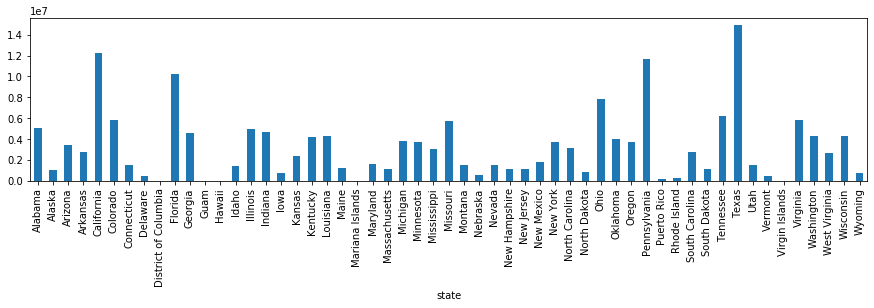

In [87]:
# let see which state has more gun, 
gun.groupby('state')['gun_sales'].sum().plot(kind='bar', figsize=(15,3))

In [88]:
gunst = gun.groupby('state')

In [89]:
gunst.describe().head()

handgun                                                       \
             count          mean           std    min      25%      50%   
state                                                                     
Alabama      227.0   9788.709251   5368.903323  449.0   6456.5   8101.0   
Alaska       227.0   1914.546256    929.570998   71.0   1128.0   1710.0   
Arizona      227.0   7847.876652   3544.630423  169.0   5348.0   6896.0   
Arkansas     227.0   4253.674009   1922.909006  149.0   2991.5   3773.0   
California   227.0  26039.118943  11378.683730  717.0  17530.5  23123.0   

                             long_gun                ... multiple           \
                75%      max    count          mean  ...      75%      max   
state                                                ...                     
Alabama     11544.0  47605.0    227.0  11568.409692  ...    563.0   1752.0   
Alaska       2638.5   5265.0    227.0   2520.590308  ...    176.5    373.0   
Arizona      9690.5  25562.0    227.0   6523.180617  ...    486.0   1102.0   
Arkansas     4943.0  13780.0    227.0   7327.118943  ...    311.0    738.0   
California  32584.5  74399.0    227.0  26153.171806  ...      0.0  38907.0   

           gun_sales                                                        \
               count          mean           std     min      25%      50%   
state                                                                        
Alabama        227.0  22284.255507  10882.761070  1072.0  15054.5  19089.0   
Alaska         227.0   4689.797357   1812.974401   143.0   3342.5   4323.0   
Arizona        227.0  15119.770925   5853.135939   389.0  11099.0  13166.0   
Arkansas       227.0  12126.334802   4796.160308   600.0   8942.5  10770.0   
California     227.0  54023.691630  21977.630259  1667.0  38010.5  49642.0   

                               
                75%       max  
state                          
Alabama     26362.0   84819.0  
Alaska       5872.0   12195.0  
Arizona     18164.0   42350.0  
Arkansas    14620.0   32565.0  
California  64765.5  156873.0  

[5 rows x 32 columns]

In [90]:
# let see inside on item inside groupby object 
list(gunst)[0]

('Alabama',            month    state  handgun  long_gun  multiple  gun_sales
 0     2017-09-01  Alabama   5734.0    6320.0       317    12688.0
 55    2017-08-01  Alabama   6289.0    6045.0       311    12956.0
 110   2017-07-01  Alabama   6046.0    4790.0       258    11352.0
 165   2017-06-01  Alabama   8275.0    4782.0       334    13725.0
 220   2017-05-01  Alabama   7198.0    4559.0       309    12375.0
 275   2017-04-01  Alabama   7131.0    4724.0       261    12377.0
 330   2017-03-01  Alabama  10603.0    6951.0       387    18328.0
 385   2017-02-01  Alabama  10739.0    7028.0       505    18777.0
 440   2017-01-01  Alabama   6770.0    6572.0       278    13898.0
 495   2016-12-01  Alabama  13733.0   17519.0       533    32318.0
 550   2016-11-01  Alabama  10214.0   13470.0       599    24882.0
 605   2016-10-01  Alabama   7757.0    8865.0       429    17480.0
 660   2016-09-01  Alabama   7125.0    8449.0       372    16318.0
 715   2016-08-01  Alabama   8243.0    7808.0      

__pretty neat, I will write a function to get the growth rate of each state__

In [91]:
def gun_growth(state):
    state_name, data = state
    data['month'] = pd.to_datetime(data['month'])
    data.set_index(data['month'], inplace=True)
    data_ = data['gun_sales'].resample('1Y').sum()
    data_ = data_[1:-1]
    rate = (data_[-1]-data_[0])/data_[0]
    return {'state': state_name, 'rate': rate}

In [92]:
growths = list()

In [93]:
for elem in list(gunst):
    growths.append(gun_growth(elem))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys


In [94]:
growths

[{'state': 'Alabama', 'rate': 0.15292997427495789},
 {'state': 'Alaska', 'rate': 0.7951514325312976},
 {'state': 'Arizona', 'rate': 0.8646833872638674},
 {'state': 'Arkansas', 'rate': -0.06615745539854875},
 {'state': 'California', 'rate': 0.42568784110729757},
 {'state': 'Colorado', 'rate': 0.7150602020294186},
 {'state': 'Connecticut', 'rate': 2.6628683520310332},
 {'state': 'Delaware', 'rate': 1.7758543165467626},
 {'state': 'District of Columbia', 'rate': 34.19047619047619},
 {'state': 'Florida', 'rate': 2.872869839525088},
 {'state': 'Georgia', 'rate': 0.344377629831134},
 {'state': 'Guam', 'rate': 10.607954545454545},
 {'state': 'Hawaii', 'rate': -1.0},
 {'state': 'Idaho', 'rate': 0.44428235675500444},
 {'state': 'Illinois', 'rate': 1.9066046794733886},
 {'state': 'Indiana', 'rate': 1.3297862396379112},
 {'state': 'Iowa', 'rate': -0.17174959871589085},
 {'state': 'Kansas', 'rate': 0.5128224119095672},
 {'state': 'Kentucky', 'rate': 0.04343334797734532},
 {'state': 'Louisiana', 'r

In [95]:
# import numpy to remove on infinity value
import numpy as np

In [96]:
for elem in growths:
    if np.isinf(elem['rate']):
        growths.remove(elem)

In [97]:
rates = [elem['rate'] for elem in growths]
states = [elem['state'] for elem in growths]

In [98]:
df2 = pd.DataFrame({'rates': rates, 'states': states})

In [99]:
df3 = df2.sort_values('rates').tail(n=10)

In [100]:
df3.head()

,rates,states
14,1.906605,Illinois
41,1.995054,Puerto Rico
31,1.996615,New Hampshire
32,2.050350,New Jersey
50,2.130907,Washington


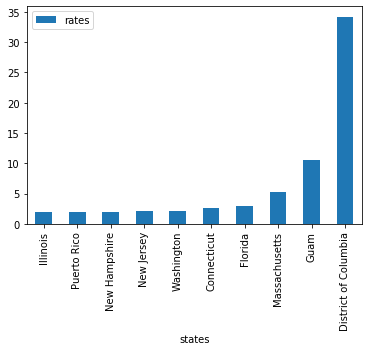

In [101]:
df3.plot.bar(x='states', y='rates');

In [102]:
# let see what is going on with D.C.
def get_state(state):
    for state_ in list(gunst):
        a,b = state_
        b['month'] = pd.to_datetime(b['month'])
        b.set_index(b['month'], inplace=True)
        b = b['gun_sales'].resample('1Y').sum()
        if a == state:
            return b

In [103]:
dc = get_state('District of Columbia')

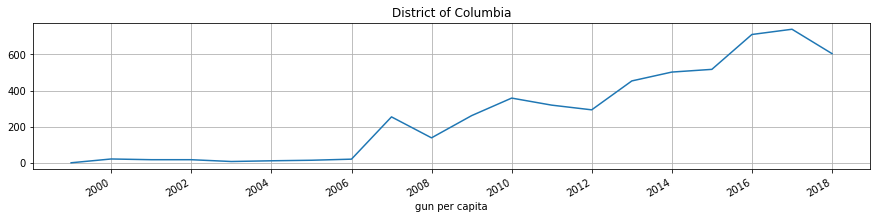

In [104]:
fig, ax = plt.subplots(figsize=(15,3))
ax.set_title('District of Columbia')
ax.set_xlabel('gun per capita')
ax.plot(dc.index, dc)
ax.grid()
fig.autofmt_xdate()

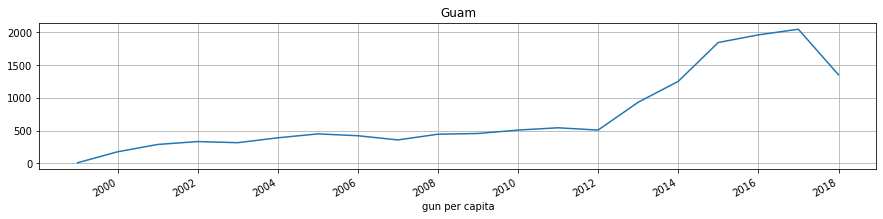

In [105]:
label = 'Guam'
state = get_state(label)
fig, ax = plt.subplots(figsize=(15,3))
ax.set_title(label)
ax.set_xlabel('gun per capita')
ax.plot(state.index, state)
ax.grid()
fig.autofmt_xdate()

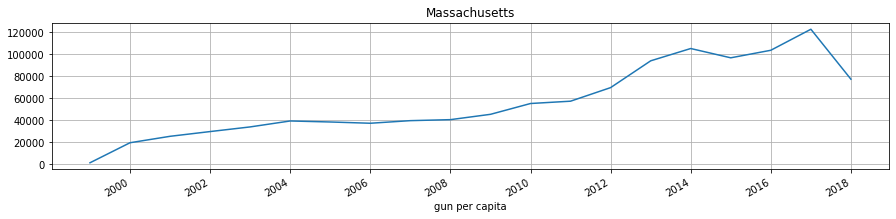

In [106]:
label = 'Massachusetts'
state = get_state(label)
fig, ax = plt.subplots(figsize=(15,3))
ax.set_title(label)
ax.set_xlabel('gun per capita')
ax.plot(state.index, state)
ax.grid()
fig.autofmt_xdate()

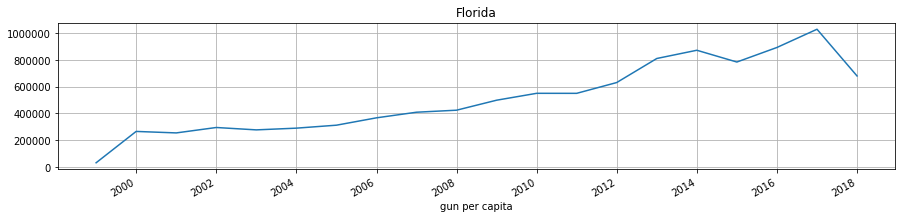

In [107]:
label = 'Florida'
state = get_state(label)
fig, ax = plt.subplots(figsize=(15,3))
ax.set_title(label)
ax.set_xlabel('gun per capita')
ax.plot(state.index, state)
ax.grid()
fig.autofmt_xdate()

<a id='q3'></a>
## 3. What is the overall trend of gun purchases?

as noted by the NYTimes, the gun sale went by the end of the year, and for a longer timespan, the goverment proposal on gun control has a strong effect on gun sales

In [108]:
gunm = gun.groupby('month')['gun_sales'].sum()

In [109]:
gunm.index = pd.to_datetime(gunm.index, format='%Y-%m')

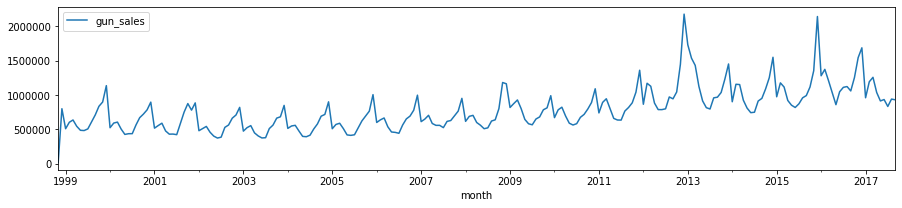

In [110]:
gunm.plot(kind='line', figsize=(15,3), legend='US Gun Sales')

In [111]:
# let make the graph easier to see
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

In [112]:
import datetime

In [113]:
x1 = datetime.datetime(2000,12,31)
x2 = datetime.datetime(2017,12,31)

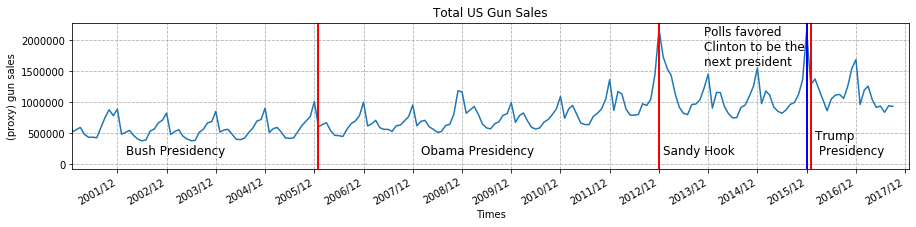

In [114]:
fig, ax = plt.subplots(figsize=(15,3))
ax = plt.gca()
ax.set_xlim(left=x1,right=x2)
ax.grid(which='major', axis='both', linestyle='--')
ax.set_title('Total US Gun Sales')
ax.set_xlabel('Times')
ax.set_ylabel('(proxy) gun sales')
ax.plot(gunm.index, gunm)
fig.autofmt_xdate()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=12))
ax.xaxis.set_major_formatter(DateFormatter("%Y/%m"))
# ax.grid(True)
ax.axvline(x='2012-12', linewidth=2, color='r')
ax.text(x='2013-1', y=150000, s='Sandy Hook', fontsize=12)
ax.axvline(x='2016-1', linewidth=2, color='r')
ax.text(x='2016-2', y=150000, s="Trump\n Presidency", fontsize=12)
ax.text(x='2013-11', y=1600000, s="Polls favored\nClinton to be the \nnext president", fontsize=12)
ax.axvline(x='2015-12', linewidth=2, color='blue')
ax.text(x='2002-2', y=150000, s="Bush Presidency", fontsize=12)
ax.axvline(x='2006-1', linewidth=2, color='r')
ax.text(x='2008-2', y=150000, s="Obama Presidency", fontsize=12)
plt.gca().xaxis.grid(True)
plt.show()

- clear trend during the year which the peaks during the shopping reason of the end of each year
- national sale during Bush presidency is stable 
- steady increasing the gun sales during the Obama presidency
- mass shooting followed by a tougher gun control such as with Sandy Hook spikes gun sales

<a id='conclusions'></a>
## Conclusions
- using a simple estimation by [Jurgen Brauer](http://www.smallarmssurvey.org/fileadmin/docs/F-Working-papers/SAS-WP14-US-Firearms-Industry.pdf) as the proxy for gun sales, and the U.S Census Data, I analyzed and visualized the correlation of some census data with the gun per capita.
- veteran and land per capita are the two parameters show pronounced correlation. A higher gun per capita correlated with a larger portion of veteran in the general population, and correlated to less crowded population
- states and territories that showed the high gun sales during 1998-2017 are Disticts of Columbia, Guam, Massachesetts, Florida, and Connecticut. Note that the proxy gun sale is based on the background checks which is biased to a states that have more rigorous gun control laws.
- Year-end shopping reasons spiked up gun scales as well as a goverment call for a tougher gun control. Gun sales during Bush presidency seemed stable while steady increased during Obama presidency.

In [115]:
from subprocess import call
call(['python3.7', '-m', 'nbconvert', 'fbi_gun_data_v1.3.ipynb'])

0